In [2]:
# Task 1: Exploring and Visualizing a Simple Dataset - Iris Dataset

In [3]:
pip install pandas seaborn matplotlib scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Importing necessary libraries

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error
import numpy as np

In [7]:
# Introduction and Problem Statement

In [9]:
# In this task, I explore the Iris dataset to understand data structure,perform basic visualizations, and train a simple machine learning model.

In [8]:
# Dataset Loading and Understanding

In [10]:
# Load Iris dataset

In [14]:
dataframe = pd.read_csv('Iris.csv')
dataframe

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
# Show basic structure

In [19]:
print("Shape of dataset:", dataframe.shape)
print("\nColumns:", dataframe.columns.tolist())
print("\nFirst 5 rows:")
display(dataframe.head())

Shape of dataset: (150, 6)

Columns: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

First 5 rows:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
# Data Cleaning and Preparation

In [21]:
# Drop 'Id' column if exists
if 'Id' in dataframe.columns:
    dataframe.drop('Id', axis=1, inplace=True)

In [22]:
# Check for missing values
print("\nMissing values:")
print(dataframe.isnull().sum())


Missing values:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [23]:
# Check data types
print("\nData types:")
print(dataframe.dtypes)


Data types:
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [24]:
# Rename columns for consistency (optional)
dataframe.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [25]:
# Exploratory Data Analysis (EDA)

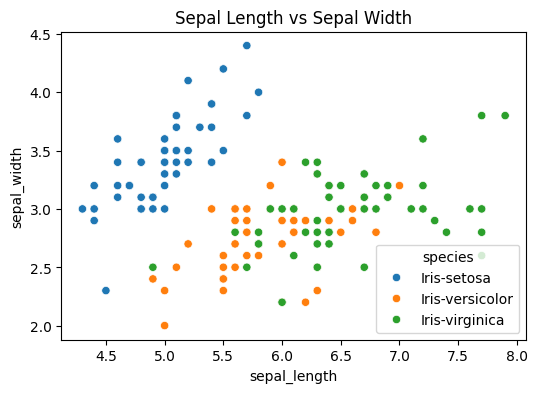

In [26]:
# Scatter Plot - Sepal Length vs Sepal Width
plt.figure(figsize=(6, 4))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=dataframe)
plt.title('Sepal Length vs Sepal Width')
plt.show()

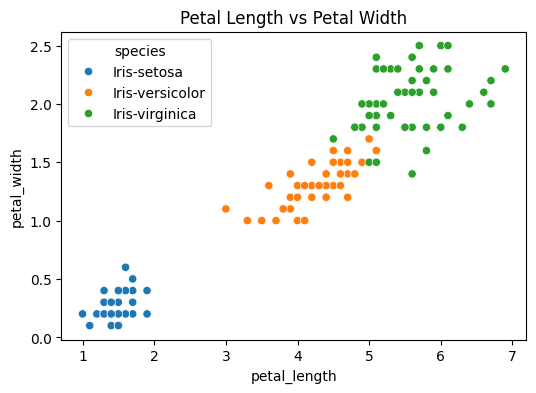

In [27]:
# Scatter Plot - Petal Length vs Petal Width
plt.figure(figsize=(6, 4))
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=dataframe)
plt.title('Petal Length vs Petal Width')
plt.show()

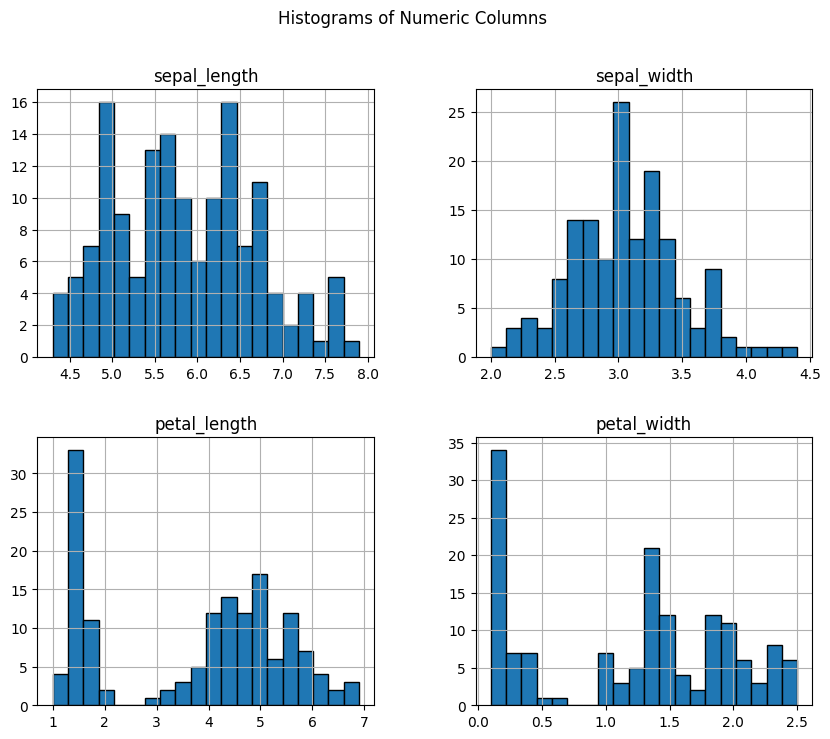

In [28]:
# Histogram for all numeric columns
dataframe.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numeric Columns')
plt.show()

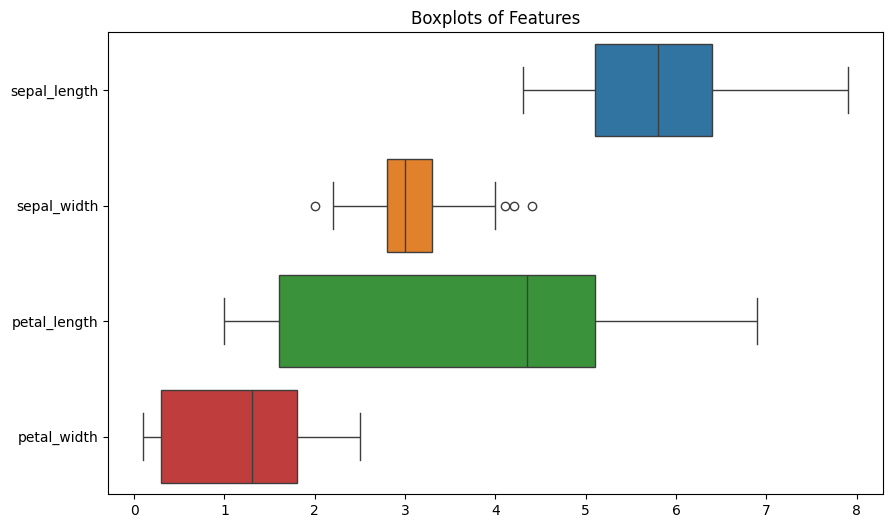

In [29]:
# Boxplot to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataframe.drop('species', axis=1), orient='h')
plt.title('Boxplots of Features')
plt.show()


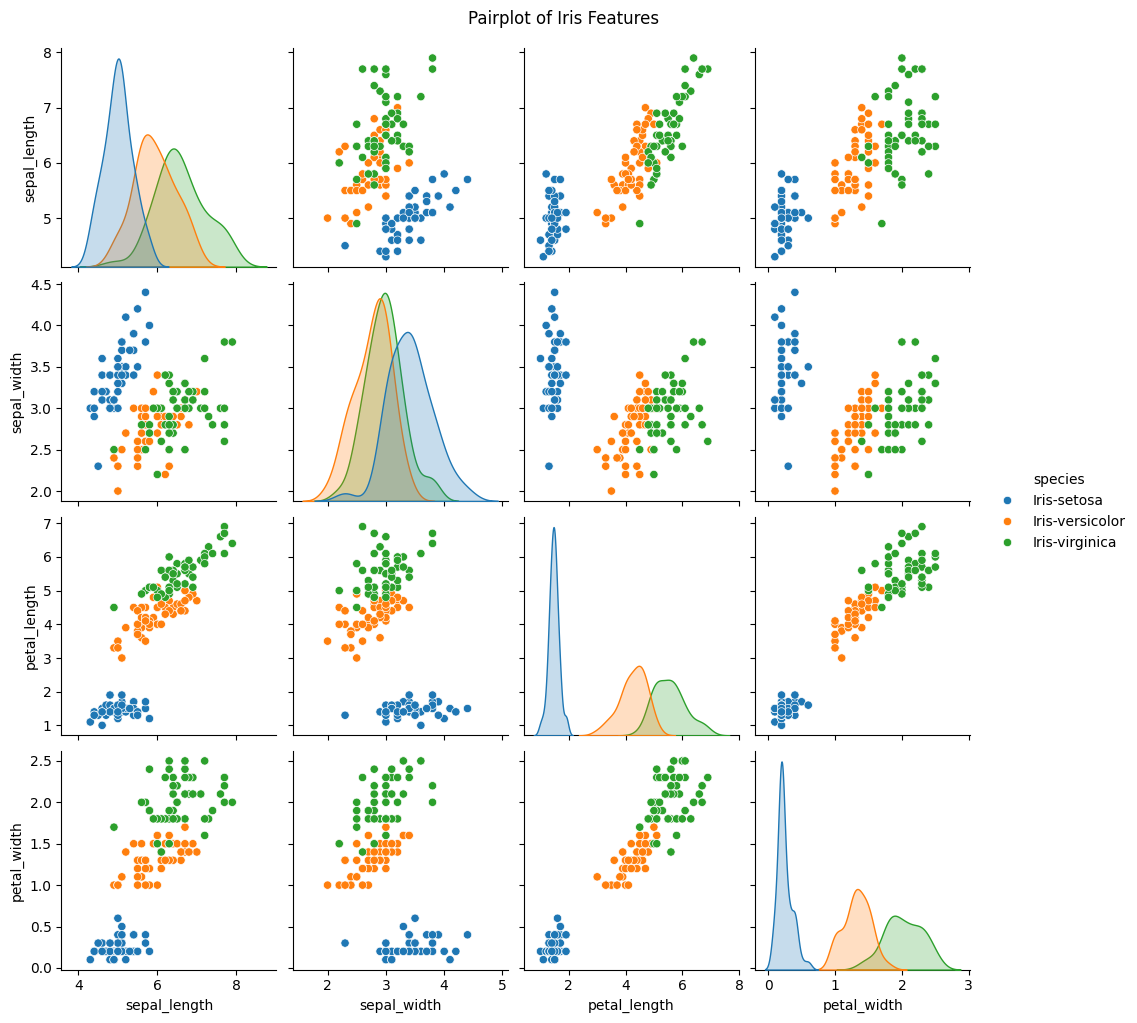

In [30]:
# Pairplot
sns.pairplot(dataframe, hue='species')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

In [31]:
# Model Training and Testing (Logistic Regression)

In [34]:
# Encode target labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataframe['species_encoded'] = le.fit_transform(dataframe['species'])

In [35]:
# Split features and labels
X = dataframe[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = dataframe['species_encoded']

In [36]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# Train logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [39]:
# Predict
y_pred = model.predict(X_test)

In [40]:
# Evaluation Metrics

In [41]:
print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))


 Accuracy: 1.0

 Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

 Mean Absolute Error: 0.0
Root Mean Squared Error: 0.0


In [42]:
# Conclusion

In [43]:
# Clean and balanced dataset with no missing values
# Petal features show clear class separation
# Logistic Regression achieved high accuracy